In [50]:
using Plots, JSON, Peaks, OrderedCollections, DataFrames, StatsPlots, LaTeXStrings, StatsBase, MultivariateStats, Clustering, CSV, Distances, PGFPlotsX
gr()
# pgfplotsx()

Plots.PGFPlotsXBackend()

In [3]:
master_df = CSV.File("2019-07-01-FSR-public_7061.csv") |> DataFrame;

In [4]:
data = JSON.parsefile("patterns_540.json", 
    dicttype=Dict,
    inttype=Int64,
    );

In [5]:
tgt = CSV.File("xe.dat") |> DataFrame
data["target.cif"] = tgt.theta,tgt.int

([4.03, 4.056, 4.082, 4.108, 4.134, 4.16, 4.186, 4.212, 4.238, 4.264  …  39.728, 39.754, 39.78, 39.806, 39.832, 39.858, 39.884, 39.91, 39.936, 39.962], [0.14756460269550806, 0.07593756420866207, 0.027872626154214694, 0.003647348112032414, -0.008179140405098737, -0.007941941816776639, -0.014447410095475977, -0.00993850187553682, -0.0038827067287750417, 0.0  …  -0.006898650506501704, -0.005080942691783007, -0.005544639228656973, -0.0067733170466287304, -0.005287326778580806, -0.0042312153720347224, -0.0030532485401810142, -0.002616568878948663, -0.003175041857728548, 0.0])

In [6]:

len = 20
loc_valor = map(data |> values) do (x,y)
    pks, vals = findmaxima(y)
    pks, proms = peakproms(pks, y)
    # rt = sort(vals, rev = :true) |> vals -> length(vals) > len ? vals[begin:len] : nothing
    rt = sort(proms, rev = :true) |> proms -> length(proms) > len ? proms[begin:len] : nothing #Ordeno por promincencia
    rtl = isnothing(rt) ? 0 : length(rt)
    rtl > 0 ? (x[begin:rtl], rt) : nothing #Retorno nothing si no hay numero suficiente de picos
end;

In [7]:
idx = findall(!isnothing, loc_valor);
loc_valor = loc_valor[idx];
labels = (data |> keys |> collect)[idx];


In [8]:
@assert "target.cif" ∈ labels

In [11]:
key = keys(data) |> collect |> sample
key = "target.cif" 
x,y = data[key]
pos = findall(x -> x == key, data |> keys |> collect ) |> first
# 
# df = DataFrame(x = x, y=y)
# p = @df df Plots.plot(:x, :y,
    # title=key,
    # xlabel=L"2\theta",
    # ylabel="Intensity",
# ) 
# 
# locs = loc_valor[pos][1]
# 
# for pk ∈ locs
    # vline!([pk], label = :false, color = :green)
# end
# p

1743

In [13]:
data_pc = map(loc_valor) do (x,y)
    vcat(x,y)' |> Array{Float64}
end #|> x -> vcat(x...)
pca_raw_data = vcat(data_pc...) ;


In [14]:
M = fit(PCA, pca_raw_data', maxoutdim = 3) 

PCA(indim = 40, outdim = 3, principalratio = 0.9292336396370794)

Pattern matrix (unstandardized loadings):
───────────────────────────────────
          PC1         PC2       PC3
───────────────────────────────────
1   -0.443819    0.224063  1.46657
2   -0.695992    0.332199  1.92117
3   -0.91069     0.338525  2.3269
4   -1.04105     0.325462  2.64399
5   -1.18257     0.310329  2.96274
6   -1.27727     0.303681  3.18828
7   -1.38525     0.305365  3.40739
8   -1.46555     0.300327  3.61007
9   -1.54491     0.315777  3.82677
10  -1.60092     0.322833  4.01474
11  -1.6861      0.335294  4.22443
12  -1.76567     0.340852  4.40535
13  -1.82644     0.332846  4.5806
14  -1.89073     0.341935  4.73421
15  -1.93312     0.34778   4.88288
16  -1.99185     0.354174  5.0071
17  -2.04117     0.339428  5.10525
18  -2.0759      0.343451  5.20869
19  -2.11864     0.344469  5.31299
20  -2.15698     0.342662  5.45749
21  32.9276    -11.9734    3.47252
22  17.5626     10.798     0.18504
23  10.0339      

In [15]:
reconstructed = predict(M, pca_raw_data')

3×6784 Matrix{Float64}:
  36.2266  -56.3375    60.8467    …  -22.2177  -60.366    -14.9414
 -26.0452  -21.6246     0.654174      37.199   -45.7548    44.5951
 -41.6134   -4.29709  -22.7682        18.2032   -2.41798    3.10503

In [16]:
R = kmeans(reconstructed, 10, display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       3.793848e+06
      1       2.563513e+06      -1.230334e+06 |       10
      2       2.353971e+06      -2.095424e+05 |       10
      3       2.293302e+06      -6.066913e+04 |       10
      4       2.266561e+06      -2.674117e+04 |       10
      5       2.250416e+06      -1.614443e+04 |       10
      6       2.241403e+06      -9.013296e+03 |       10
      7       2.236146e+06      -5.256692e+03 |        8
      8       2.233032e+06      -3.114437e+03 |        9
      9       2.230362e+06      -2.669596e+03 |        9
     10       2.228747e+06      -1.615185e+03 |       10
     11       2.227979e+06      -7.683235e+02 |        9
     12       2.227618e+06      -3.602947e+02 |        8
     13       2.227314e+06      -3.047155e+02 |        8
     14       2.227153e+06      -1.611273e+02 |        8
     15       2.227083e+06      -7.010572e+01 |        

KmeansResult{Matrix{Float64}, Float64, Int64}([-17.553299974393074 53.88081771577861 … -45.07417366598277 -7.281401559170613; 23.889682344452165 -7.883940728203644 … -3.274866044226938 11.64042950276207; -12.450342070272246 -26.177701546403583 … 1.2382894669950542 -50.833220933511555], [2, 9, 2, 2, 4, 4, 4, 4, 3, 6  …  4, 1, 4, 8, 1, 1, 9, 8, 3, 8], [879.765154459762, 494.2157586466119, 133.04745561231175, 116.5849035367637, 997.1286933865854, 315.126157681397, 79.7025738756667, 17.247908473837697, 823.4717354472305, 46.79467977807053  …  94.07375932829234, 325.50427308769486, 926.5580212481443, 104.6446679644223, 431.80539185649263, 163.21956362536912, 90.86542700207974, 102.88468227556405, 149.18751628373502, 372.4068010832625], [809, 515, 441, 804, 640, 975, 450, 927, 1004, 219], [809, 515, 441, 804, 640, 975, 450, 927, 1004, 219], 2.226918182135963e6, 23, true)

In [17]:
R.centers

3×10 Matrix{Float64}:
 -17.5533   53.8808   -71.0148  15.7013   …  -21.5758  -45.0742    -7.2814
  23.8897   -7.88394  -41.365   -4.22202      28.9778   -3.27487   11.6404
 -12.4503  -26.1777     1.6464   4.09549      12.2969    1.23829  -50.8332

In [18]:
p = scatter(reconstructed[1,:], reconstructed[2,:], reconstructed[3,:], marker_z = R.assignments, label = "Instances", size = (1920,1080))
scatter!([reconstructed[1,pos]],[ reconstructed[2,pos]], [reconstructed[3,pos]], marker_z = R.assignments, markersize = 11, marker=:octagon,color=:blue, label = "PerMOF")
scatter!(R.centers[1,:], R.centers[2,:], R.centers[3,:], marker = :diamond, markersize = 9, label = "Centers")
savefig("clustels.png")

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Xorg_xkeyboard_config_jll [33bec58e-1273-512f-9401-5d533626f822]
│   exception = Required dependency Xorg_libxkbfile_jll [cc61e674-0454-545c-8b26-ed2c68acab7a] failed to load from a cache file.
└ @ Base loading.jl:1132
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for xkbcommon_jll [d8fb68d0-12a3-5cfd-a85a-d49703b185fd]
│   exception = Required dependency Xorg_libxkbfile_jll [cc61e674-0454-545c-8b26-ed2c68acab7a] failed to load from a cache file.
└ @ Base loading.jl:1132
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Xorg_xkeyboard_config_jll [33bec58e-1273-512f-9401-5d533626f822]
│   exception = Required dependency Xorg_libxkbfile_jll [cc61e674-0454-545c-8b26-ed2c68acab7a] failed to load from a cache file.
└ @ Base loading.jl:1

In [19]:
lbls = [ lbl[begin:end-4] for lbl in labels]
mapping = Dict(k => v for (k,v) in zip(lbls,R.assignments));

In [158]:
println("La referencia está en el cluster $(R.assignments[pos])")

La referencia está en el cluster 4


In [121]:
df_fsr = filter(
    x -> x.filename ∈ labels .|> label -> label[begin:end - 4] ,
    master_df
)
df_fsr."cluster_assignment" = map(filename -> mapping[filename], df_fsr.filename);

In [122]:
dist = Euclidean()
pwdist = pairwise(dist,reconstructed, dims=2)
idx10masparecidos = partialsortperm(pwdist[pos,2:end], 1:10); 


In [114]:
idx100masparecidos = partialsortperm(pwdist[pos,2:end], 1:100) 
los100masconref = hcat(reconstructed[:,idx100masparecidos], reconstructed[:,pos])
pw100 = pairwise(dist,los100masconref,dims=2)

hc = hclust(pw100)
plot(hc, size = (6000,3000))
savefig("hclust.png")

In [152]:
function hierarchical_clustering(pca_otp::Any, n::Union{Bool,T}, pos_ref::T, labels ) where {T <: Int, S}
    dist = Euclidean()
    pairwise_distance = pairwise(dist, pca_otp, dims = 2)
    if n != :false
        indeces = partialsortperm(pairwise_distance[pos_ref,2:end], 1:n)
        ipt = hcat(pca_otp[:,indeces], pca_otp[:,pos_ref])
        pairwise_distance = pairwise(dist, ipt, dims = 2)
        for (n,idx) in enumerate(indeces)
            println("Indice $n es $(labels[idx])")
        end
    end
    pos_ref = n + 1
    println("Ref es el nro $pos_ref")
    hclust(pairwise_distance)
end

hierarchical_clustering (generic function with 6 methods)

Indice 1 es NIWZIE10_freeONLY.cif
Indice 2 es c5dt00281h_c5dt00281h2_freeONLY.cif
Indice 3 es ETUWOG_freeONLY.cif
Indice 4 es BASJUB_freeONLY.cif
Indice 5 es cm303749m_si_001_freeONLY.cif
Indice 6 es PUBSIP_freeONLY.cif
Indice 7 es AHOKIR01_freeONLY.cif
Indice 8 es FAVGER_freeONLY.cif
Indice 9 es AWAREV_freeONLY.cif
Indice 10 es QOSJUF_freeONLY.cif
Ref es el nro 11


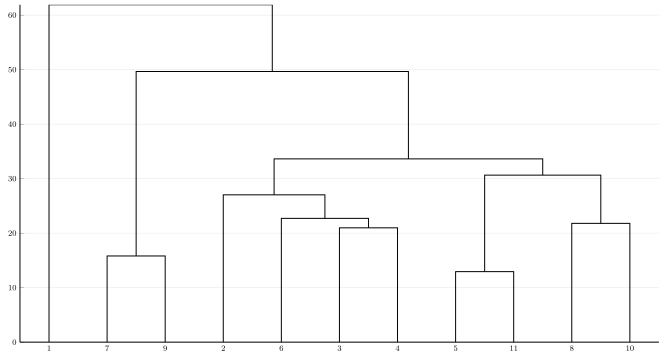

In [156]:
hc10 = hierarchical_clustering(reconstructed, 10, pos, labels)
plot(hc10, size = (1920/2, 1080/2))

In [65]:
plots_db = []
ref = Plots.plot(data["target.cif"], label = "referencia")
ylabel!(L"\textrm{Transmitancia}")
xlabel!(L"\textrm{Nro de onda} (cm^-1)")
for label in labels[idx10masparecidos]
    x,y = data[label]
    pi = plot(ref)
    title!(label)
    push!(plots_db,plot!(pi,x,y./100, legend = false))
end
plot(plots_db..., size = (8000,3000))
savefig("to2.png")

In [86]:
mtch = labels[idx10masparecidos] .|> x -> x[begin:end-4]

10-element Vector{String}:
 "NIWZIE10_freeONLY"
 "c5dt00281h_c5dt00281h2_freeONLY"
 "ETUWOG_freeONLY"
 "BASJUB_freeONLY"
 "cm303749m_si_001_freeONLY"
 "PUBSIP_freeONLY"
 "AHOKIR01_freeONLY"
 "FAVGER_freeONLY"
 "AWAREV_freeONLY"
 "QOSJUF_freeONLY"

In [88]:
diezmasparecidos = filter(:filename => filename -> filename ∈ mtch , df_fsr)
CSV.write("10masparecidos.csv", diezmasparecidos)

"10masparecidos.csv"

In [94]:
same_cluster = filter(:cluster_assignment =>  x -> x == 4, df_fsr)
CSV.write("same_cluster.csv", same_cluster)

"same_cluster.csv"